##Data Dictionary

The data also lists five problem types:
* Type_1 is account management
* Type_2 is technician troubleshooting
* Type_3 is scheduling
* Type_4 is construction
* Type_5 is internet and wifi



In [63]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'my-first-project-451900' # Project ID inserted based on the query results selected to explore my-first-project-451900
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=my-first-project-451900:US:bquxjob_1e91e016_19543b8fa02)
back to BigQuery to edit the query within the BigQuery user interface.

In [64]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1e91e016_19543b8fa02') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT*
FROM `my-first-project-451900.fiber.market_1`
UNION ALL
SELECT*
FROM `my-first-project-451900.fiber.market_2`
UNION ALL
SELECT*
FROM `my-first-project-451900.fiber.market_3`


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [65]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_1e91e016_19543b8fa02') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Reading cached table from 2025-02-26 19:28:47.345182+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-03-29,38,2,1,2,1,2,2,1,type_1,market_1
1,2022-02-23,29,null,1,null,1,null,null,null,type_2,market_2
2,2022-01-07,29,null,1,null,null,1,1,1,type_2,market_2
3,2022-02-09,199,18,8,8,6,9,7,1,type_5,market_1
4,2022-01-19,2,null,1,1,1,null,null,null,type_4,market_1
5,2022-03-12,15,0,2,0,3,1,1,1,type_1,market_1
6,2022-02-28,35,3,0,3,0,3,0,0,type_1,market_1
7,2022-03-06,5,3,null,null,1,1,3,2,type_3,market_3
8,2022-01-10,7,null,1,null,null,null,null,null,type_3,market_2
9,2022-03-31,1,null,null,null,null,null,null,null,type_4,market_3


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [66]:
# Generate descriptive statistics.
bq_df.describe()

,date_created
count,1350


In [67]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

In [120]:
pandas_df.head()

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-03-29,38,2,1,2,1,2,2,1,type_1,market_1
1,2022-02-23,29,null,1,null,1,null,null,null,type_2,market_2
2,2022-01-07,29,null,1,null,null,1,1,1,type_2,market_2
3,2022-02-09,199,18,8,8,6,9,7,1,type_5,market_1
4,2022-01-19,2,null,1,1,1,null,null,null,type_4,market_1


In [121]:
# copying data to another varaible to avoid any changes to original data
df = pandas_df.copy()

In [136]:
# import numpy as np

df.replace('null', np.nan, inplace=True)
# verify
df.head(2)

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-03-29,38,2,1,2,1,2,2,1,type_1,market_1
1,2022-02-23,29,<NA>,1,<NA>,1,<NA>,<NA>,<NA>,type_2,market_2


In [131]:
# checking for duplicate values in the data, summed
df.duplicated().sum()

0

In [132]:
df.nunique()

,0
date_created,90
contacts_n,223
contacts_n_1,42
contacts_n_2,28
contacts_n_3,22
contacts_n_4,20
contacts_n_5,22
contacts_n_6,19
contacts_n_7,20
new_type,5


In [137]:
# checking for missing values in each column of the data set
df.isna().sum()

,0
date_created,0
contacts_n,182
contacts_n_1,458
contacts_n_2,529
contacts_n_3,572
contacts_n_4,611
contacts_n_5,631
contacts_n_6,634
contacts_n_7,617
new_type,0


In [138]:
# Check for missing values WITH COOL VISUAL GRAPH
df_na = (df.isna()
                    .sum()
                    .reset_index()
                    .sort_values(0, ascending=False)
                ).rename(columns={'index':'col',0:'na'})

df_na['percentage_na'] = (df_na['na'] / len(df)).round(2)

df_na.style.background_gradient()

,col,na,percentage_na
7,contacts_n_6,634,0.470000
6,contacts_n_5,631,0.470000
8,contacts_n_7,617,0.460000
5,contacts_n_4,611,0.450000
4,contacts_n_3,572,0.420000
3,contacts_n_2,529,0.390000
2,contacts_n_1,458,0.340000
1,contacts_n,182,0.130000
0,date_created,0,0.000000
9,new_type,0,0.000000


There are many missing values as the number of times a caller calls varies and may not have values past the initial or past the first couple of calls.  Since the number of calls are of interest, no changes to the dataset.

In [139]:
# define a list of columns with encoded values
count_cats = ['new_type','new_market','contacts_n_1','contacts_n_2','contacts_n_3','contacts_n_4',
              'contacts_n_5','contacts_n_6','contacts_n_7']

# iterate over the columns and print the value counts and percentages for columnss with encoded values
for col in count_cats:
  print(f"\nValue counts for column '{col}':")
  print(df[col].value_counts().reset_index(name='Count'))
  print(f"\nPercentages:")
  print((df[col].value_counts() / df[col].shape[0]) * 100)
  print('*'*50)


Value counts for column 'new_type':
  new_type  Count
0   type_1    270
1   type_2    270
2   type_5    270
3   type_4    270
4   type_3    270

Percentages:
new_type
type_1    20.0
type_2    20.0
type_5    20.0
type_4    20.0
type_3    20.0
Name: count, dtype: double[pyarrow]
**************************************************

Value counts for column 'new_market':
  new_market  Count
0   market_1    450
1   market_2    450
2   market_3    450

Percentages:
new_market
market_1    33.333333
market_2    33.333333
market_3    33.333333
Name: count, dtype: double[pyarrow]
**************************************************

Value counts for column 'contacts_n_1':
   contacts_n_1  Count
0             1    191
1             0    120
2             2    116
3             3     92
4             4     64
5             5     38
6             6     26
7             8     22
8             7     21
9            11     19
10           13     17
11           10     12
12           25     12
13        

## Appendix

SQL code to query later

In [ ]:
# # Option 1: Save as a New Table (CREATE TABLE AS)
# CREATE TABLE `my-first-project-451900.fiber.all_markets` AS
# SELECT * FROM `my-first-project-451900.fiber.market_1`
# UNION ALL
# SELECT * FROM `my-first-project-451900.fiber.market_2`
# UNION ALL
# SELECT * FROM `my-first-project-451900.fiber.market_3`;


In [ ]:
# # Option 2: Append Data to an Existing Table (INSERT INTO)
# INSERT INTO `my-first-project-451900.fiber.all_markets`
# SELECT * FROM `my-first-project-451900.fiber.market_1`
# UNION ALL
# SELECT * FROM `my-first-project-451900.fiber.market_2`
# UNION ALL
# SELECT * FROM `my-first-project-451900.fiber.market_3`;


In [70]:
# Option 3: Save as a Table from the Notebook
from google.cloud import bigquery

client = bigquery.Client()

query = """
CREATE OR REPLACE TABLE `my-first-project-451900.fiber.all_markets` AS
SELECT * FROM `my-first-project-451900.fiber.market_1`
UNION ALL
SELECT * FROM `my-first-project-451900.fiber.market_2`
UNION ALL
SELECT * FROM `my-first-project-451900.fiber.market_3`;
"""

client.query(query).result()
print("Table created successfully!")


Table created successfully!


In [71]:
%%bigquery bq_df
SELECT * FROM `my-first-project-451900.fiber.all_markets`

Query is running:   0%|          |

Downloading:   0%|          |

In [72]:
bq_df.shape

(1350, 11)

In [73]:
# Show first few rows
bq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_created  1350 non-null   dbdate
 1   contacts_n    1350 non-null   object
 2   contacts_n_1  1350 non-null   object
 3   contacts_n_2  1350 non-null   object
 4   contacts_n_3  1350 non-null   object
 5   contacts_n_4  1350 non-null   object
 6   contacts_n_5  1350 non-null   object
 7   contacts_n_6  1350 non-null   object
 8   contacts_n_7  1350 non-null   object
 9   new_type      1350 non-null   object
 10  new_market    1350 non-null   object
dtypes: dbdate(1), object(10)
memory usage: 116.1+ KB


In [74]:
bq_df.head()

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,2,0,0,0,0,0,0,0,type_1,market_2
1,2022-03-16,5,0,0,0,0,0,0,0,type_1,market_2
2,2022-03-14,5,0,1,0,0,0,0,1,type_1,market_3
3,2022-03-24,2,0,0,0,0,0,0,0,type_1,market_2
4,2022-02-07,3,0,0,0,0,0,0,0,type_1,market_2


Call Volume Over Time

In [102]:
# %%bigquery df
# SELECT DATE(date_created) AS date_created, COUNT(*) AS total_calls
# FROM `my-first-project-451900.fiber.all_markets`
# GROUP BY date_created
# ORDER BY date_created;

%%bigquery df
SELECT
    DATE(date_created) AS date_created,
    SUM(
        SAFE_CAST(contacts_n AS INT64) + COALESCE(SAFE_CAST(contacts_n_1 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_2 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_3 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_4 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_5 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_6 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_7 AS INT64), 0)
    ) AS total_calls
FROM `my-first-project-451900.fiber.all_markets`
GROUP BY date_created
ORDER BY date_created;



# my-first-project-451900 → with your actual project ID.
# my_dataset → with your dataset name.
# my_table → with your table name.

# If you're unsure of your dataset or table name, follow these steps:
# Open BigQuery Console (BigQuery UI).
# In the Explorer panel, find your project.
# Expand it to see your datasets and tables.
# Copy the full table name (it should look like project_id.dataset_name.table_name).


Query is running:   0%|          |

Downloading:   0%|          |

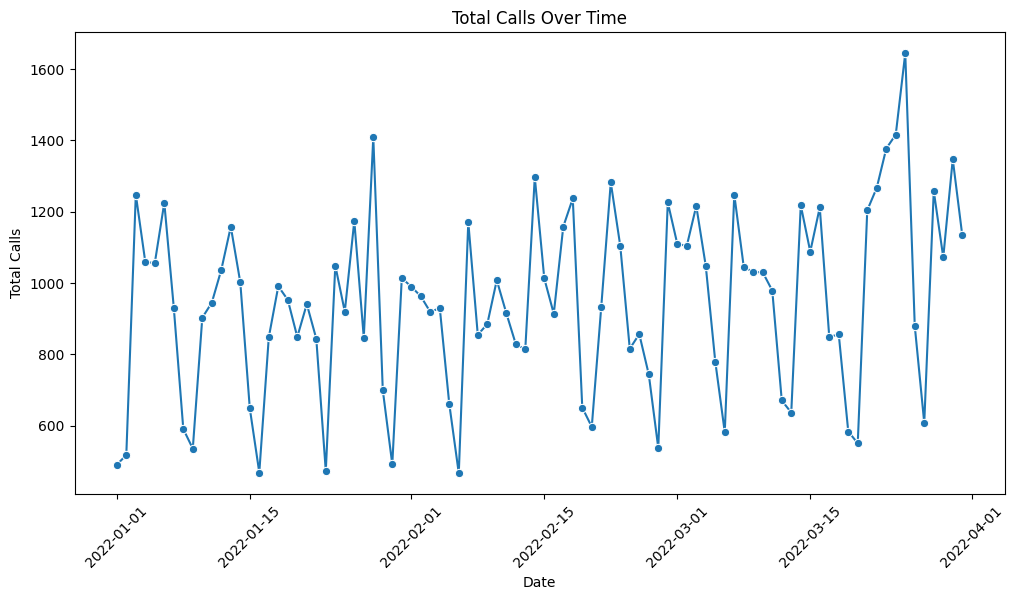

In [103]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# Convert date_created to datetime format (if needed)
df["date_created"] = pd.to_datetime(df["date_created"])

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x="date_created", y="total_calls", data=df, marker="o")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Total Calls")
plt.title("Total Calls Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


 Calls by Market

In [100]:
# %%bigquery df
# SELECT new_market, COUNT(*) AS total_calls
# FROM `my-first-project-451900.fiber.all_markets`
# GROUP BY new_market
# ORDER BY total_calls DESC;

%%bigquery df
SELECT
    new_market,
    SUM(
        SAFE_CAST(contacts_n AS INT64) + COALESCE(SAFE_CAST(contacts_n_1 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_2 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_3 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_4 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_5 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_6 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_7 AS INT64), 0)
    ) AS total_calls
FROM `my-first-project-451900.fiber.all_markets`
GROUP BY new_market
ORDER BY total_calls DESC;


Query is running:   0%|          |

Downloading:   0%|          |

<ipython-input-101-8237ee739f4a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="new_market", y="total_calls", palette="viridis")


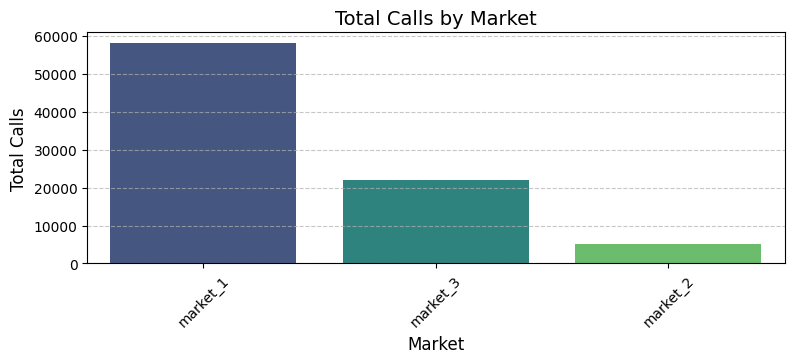

In [101]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Sort DataFrame by total_calls (just in case)
df = df.sort_values(by="total_calls", ascending=False)

# Plot the bar chart
plt.figure(figsize=(9,3))
sns.barplot(data=df, x="new_market", y="total_calls", palette="viridis")

# Formatting
plt.title("Total Calls by Market", fontsize=14)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Total Calls", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


 Calls by Type & Market (Stacked Bar Chart)

In [96]:
# %%bigquery df
# SELECT new_market, new_type, COUNT(*) AS call_count
# FROM `my-first-project-451900.fiber.all_markets`
# GROUP BY new_market, new_type
# ORDER BY call_count DESC, new_market;

%%bigquery df
SELECT
    new_market,
    new_type,
    SUM(
        SAFE_CAST(contacts_n AS INT64) + COALESCE(SAFE_CAST(contacts_n_1 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_2 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_3 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_4 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_5 AS INT64), 0) +
        COALESCE(SAFE_CAST(contacts_n_6 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_7 AS INT64), 0)
    ) AS call_count
FROM `my-first-project-451900.fiber.all_markets`
GROUP BY new_market, new_type
ORDER BY call_count DESC, new_market;



Query is running:   0%|          |

Downloading:   0%|          |

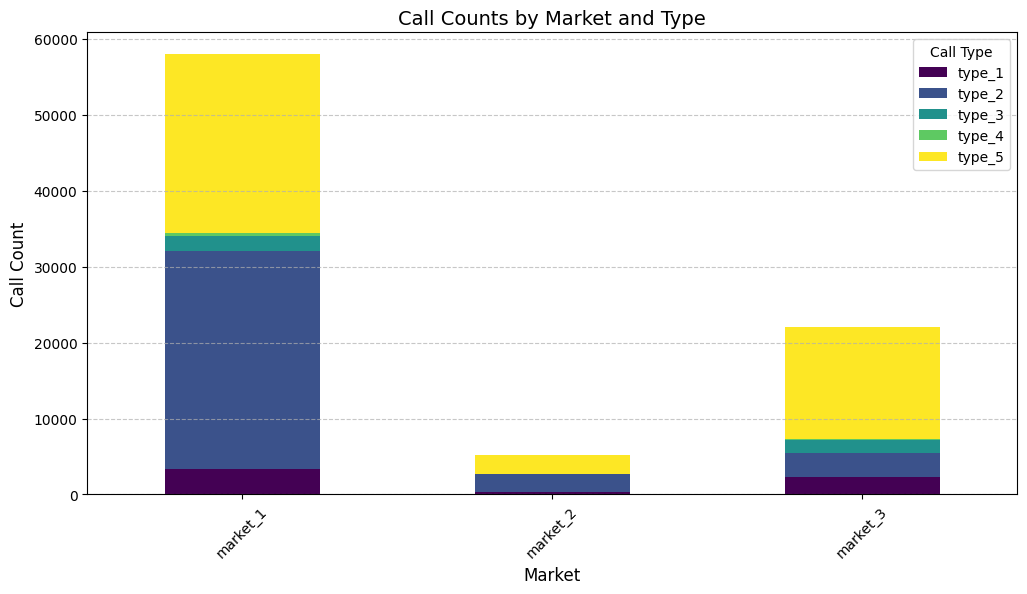

In [97]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df["new_market"] = df["new_market"].astype(str)
# df["new_type"] = df["new_type"].astype(str)

# Pivot the data
df_pivot = df.pivot(index="new_market", columns="new_type", values="call_count").fillna(0)

# Plot stacked bar chart
df_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")

# Formatting
plt.title("Call Counts by Market and Type", fontsize=14)
plt.xlabel("Market", fontsize=12)
plt.ylabel("Call Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Call Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


Repeat Calls Analysis (Heatmap)

In [88]:
%%bigquery df
SELECT
  EXTRACT(WEEK FROM date_created) AS week_number,
  EXTRACT(DAYOFWEEK FROM date_created) AS day_of_week,
  SUM(
      SAFE_CAST(contacts_n AS INT64) + COALESCE(SAFE_CAST(contacts_n_1 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_2 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_3 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_4 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_5 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_6 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_7 AS INT64), 0)
  ) AS total_repeat_calls
FROM `my-first-project-451900.fiber.all_markets`
GROUP BY week_number, day_of_week
ORDER BY week_number, day_of_week;


Query is running:   0%|          |

Downloading:   0%|          |

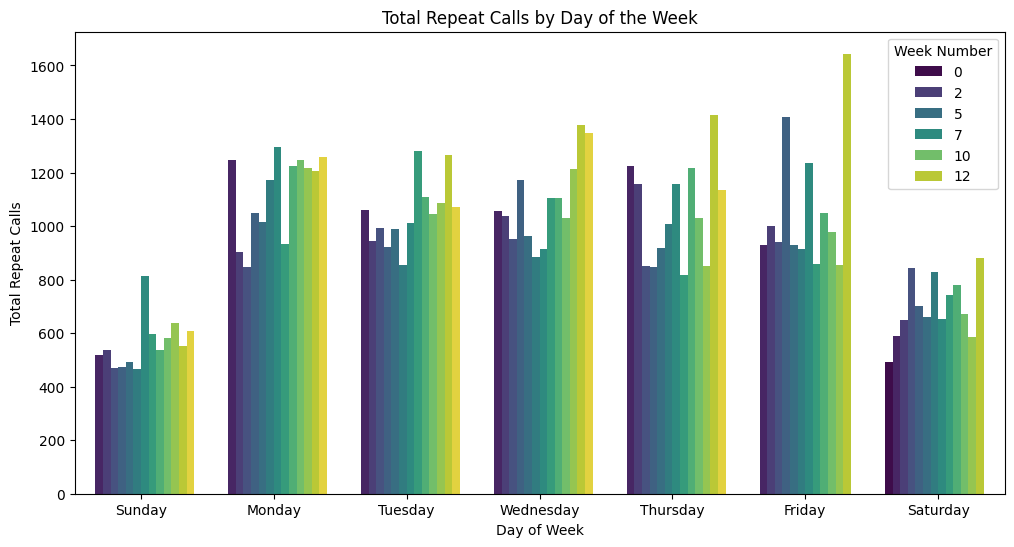

In [89]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Ensure correct data types
df["week_number"] = df["week_number"].astype(int)
df["day_of_week"] = df["day_of_week"].astype(int)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="day_of_week", y="total_repeat_calls", hue="week_number", data=df, palette="viridis")

plt.xlabel("Day of Week")
plt.ylabel("Total Repeat Calls")
plt.title("Total Repeat Calls by Day of the Week")
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

plt.legend(title="Week Number", bbox_to_anchor=(1, 1))
plt.show()



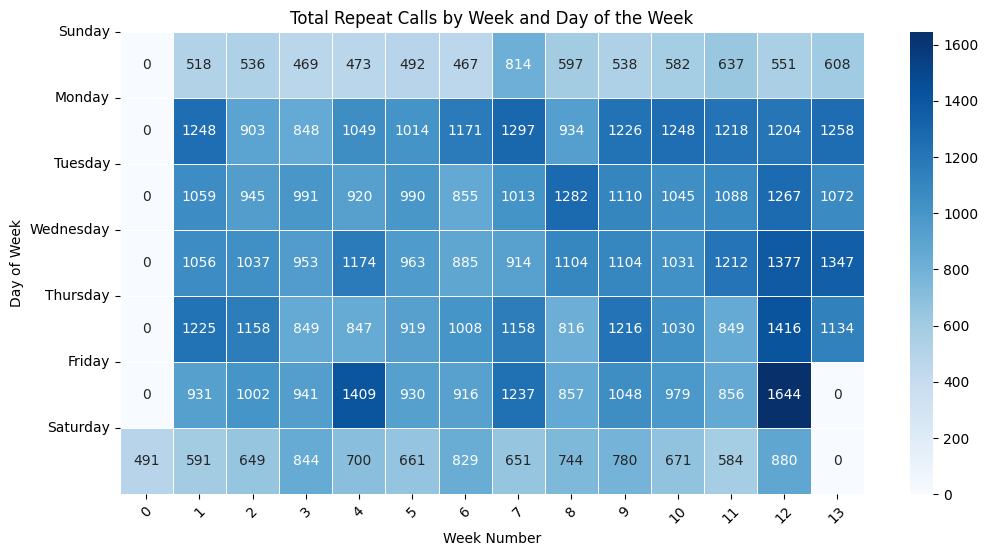

In [83]:
# Ensure "total_repeat_calls" is numeric before pivoting
df["total_repeat_calls"] = pd.to_numeric(df["total_repeat_calls"], errors="coerce")

# Pivot the dataframe for heatmap
df_pivot = df.pivot(index="day_of_week", columns="week_number", values="total_repeat_calls")

# Fix issue where missing values may break the heatmap
df_pivot = df_pivot.fillna(0)  # Replace NaN with 0

# Ensure all values are floats (required for heatmap)
df_pivot = df_pivot.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Labels and title
plt.xlabel("Week Number")
plt.ylabel("Day of Week")
plt.title("Total Repeat Calls by Week and Day of the Week")

# Fix day of week labels
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=0)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()


Average Contacts Per Call Type (Box Plot)

In [84]:
%%bigquery df
SELECT
  new_type,
  AVG(
      SAFE_CAST(contacts_n AS INT64) + COALESCE(SAFE_CAST(contacts_n_1 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_2 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_3 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_4 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_5 AS INT64), 0) +
      COALESCE(SAFE_CAST(contacts_n_6 AS INT64), 0) + COALESCE(SAFE_CAST(contacts_n_7 AS INT64), 0)
  ) AS avg_repeat_calls
FROM `my-first-project-451900.fiber.all_markets`
GROUP BY new_type
ORDER BY avg_repeat_calls DESC;




Query is running:   0%|          |

Downloading:   0%|          |

<ipython-input-85-4c295cd1417d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_repeat_calls", y="new_type", data=df, palette="viridis")


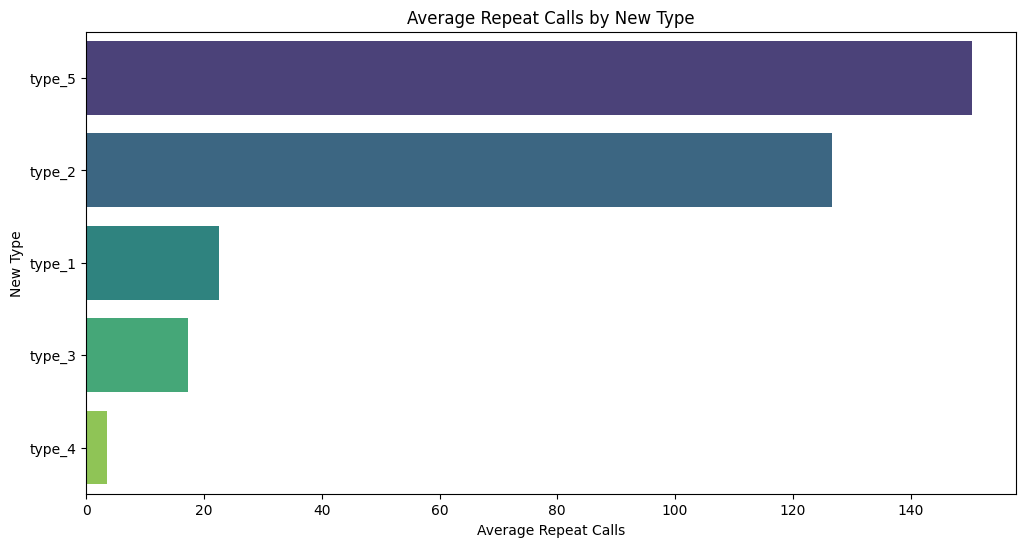

In [85]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Sort dataframe for better visualization
df = df.sort_values(by="avg_repeat_calls", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar chart
sns.barplot(x="avg_repeat_calls", y="new_type", data=df, palette="viridis")

# Labels and title
plt.xlabel("Average Repeat Calls")
plt.ylabel("New Type")
plt.title("Average Repeat Calls by New Type")

# Show plot
plt.show()


<ipython-input-57-a207d841ed74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="avg_repeat_calls", x="new_type", data=df, palette="viridis")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'type_5'),
  Text(1, 0, 'type_2'),
  Text(2, 0, 'type_1'),
  Text(3, 0, 'type_3'),
  Text(4, 0, 'type_4')])

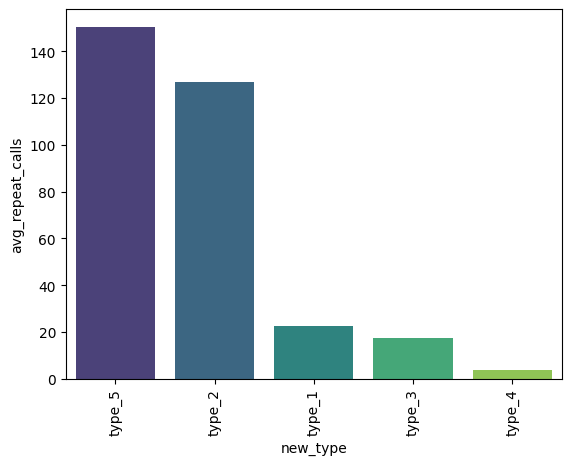

In [ ]:
sns.barplot(y="avg_repeat_calls", x="new_type", data=df, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
